**Andre Londono Discussion Section E. UC Berkeley Professional Certificate in ML/AI.**

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
def analyze_data(file_path):

    data = pd.read_csv(file_path)
    
    # Check for missing values, check for unique values, gett basic statistics and combine the results into a single DataFrame
    missing_values = data.isnull().sum()
    unique_values = data.nunique()
    basic_stats = data.describe(include='all')
    
    analysis = pd.DataFrame({
        'Missing Values': missing_values,
        'Unique Values': unique_values
    })
    
    print("Missing Values and Unique Values per Column:")
    print(analysis)
    print("\nBasic Statistics:")
    print(basic_stats)
    
    return analysis, basic_stats
    
#Call function with actual data
file_path = 'data/coupons.csv'
analysis, basic_stats = analyze_data(file_path)

Missing Values and Unique Values per Column:
                      Missing Values  Unique Values
destination                        0              3
passanger                          0              4
weather                            0              3
temperature                        0              3
time                               0              5
coupon                             0              5
expiration                         0              2
gender                             0              2
age                                0              8
maritalStatus                      0              5
has_children                       0              2
education                          0              6
occupation                         0             25
income                             0              9
car                            12576              5
Bar                              107              5
CoffeeHouse                      217              5
CarryAway          

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
#SINCE CAR COLUMN HAS ALOT OF MISSING VALUES I WILL DROP CAR COLUMN
data.drop(columns=['car'], inplace=True)

# Display the first few rows of the updated DataFrame to confirm the column has been dropped
print(data.head())

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8           

4. What proportion of the total observations chose to accept the coupon?



In [55]:
total_accepted = data['Y'].sum()

# Calculate the total number of coupons issued
total_issued = data.shape

accepted_proportion = data['Y'].mean()
print(f"Proportion of accepted coupons: {accepted_proportion:.2f}")


total_accepted = data['Y'].sum()
# Calculate the total number of coupons issued
total_issued = data.shape

#print(f"Total accepted (value): {total_accepted}, Type: {type(total_accepted)}")
#print(f"Total issued (value): {total_issued}, Type: {type(total_issued)}")

print(f"Total number of accepted coupons: {total_accepted}")
print(f"Total number of coupons issued: {total_issued}")
#print(f"Proportion of accepted coupons: {total_accepted / total_issued:.2f}")

Proportion of accepted coupons: 0.57
Total number of accepted coupons: 7210
Total number of coupons issued: (12684, 27)


5. Use a bar plot to visualize the `coupon` column.

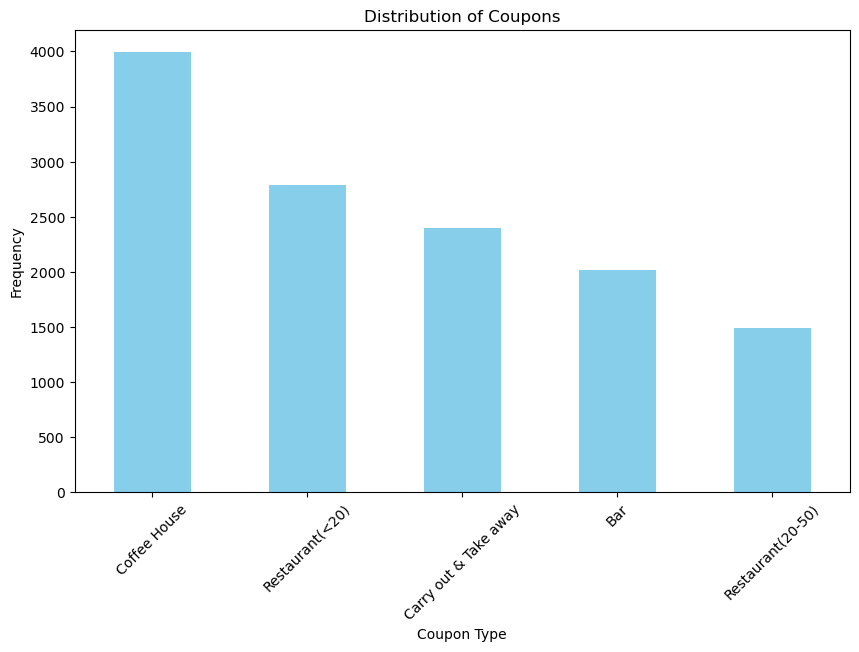

In [8]:
coupon_counts = data['coupon'].value_counts()

plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

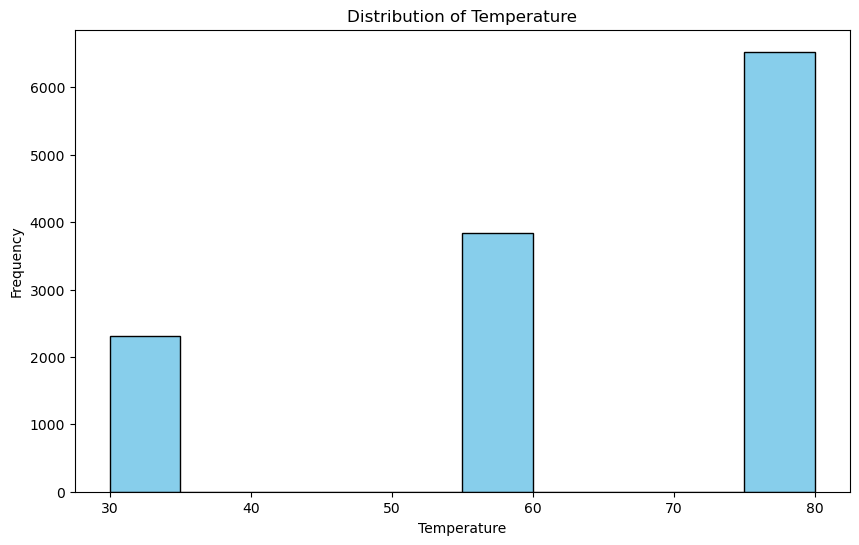

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
bar_coupons = data[data['coupon'] == 'Bar']

# Display the first few rows of the new DataFrame
print(bar_coupons.head())

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       NaN   
13  Female  21  Unmarried partner  ...        never       NaN   
17  Female  21  Unmarried partner  ...        never       NaN   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

2. What proportion of bar coupons were accepted?


In [13]:
proportion_accepted = bar_coupons['Y'].mean()


print(f"Proportion of accepted bar coupons: {proportion_accepted:.2f}")

Proportion of accepted bar coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:

data_bar_3_or_less = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
data_bar_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

acceptance_rate_3_or_less = data_bar_3_or_less['Y'].mean()
acceptance_rate_more_than_3 = data_bar_more_than_3['Y'].mean()

#print(' 3 or fewer times a month:', acceptance_rate_3_or_less)
#print(' more than 3 times a month:', acceptance_rate_more_than_3)

print(f'Acceptance Rate for 3 or fewer times a month: {acceptance_rate_3_or_less * 100:.2f}%')
print(f'Acceptance Rate for more than 3 times a month: {acceptance_rate_more_than_3 * 100:.2f}%')

Acceptance Rate for 3 or fewer times a month: 37.06%
Acceptance Rate for more than 3 times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [58]:
# Handle 'below21' and '50plus' values in the 'age' column
data['age_numeric'] = data['age'].replace({'below21': 20, '50plus': 50}).astype(int)

# Refresh bar coupon slice to incorporate age_numeric column
bar_coupon = data[data['coupon'] == 'Bar']


#print("Unique values in 'Bar' column:", bar_coupon['Bar'].unique())
#print("Age distribution:\n", bar_coupon['age_numeric'].describe())

# Filter the dataset for drivers who go to a bar more than once a month and are over the age of 25
data_target_group = bar_coupon[(bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupon['age_numeric'] > 25)]

# Filter the dataset for all others
data_remaining_group = bar_coupon[~((bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupon['age_numeric'] > 25))]

# Drop rows with missing 'Y' values
data_target_group = data_target_group.dropna(subset=['Y'])
data_remaining_group = data_remaining_group.dropna(subset=['Y'])

# Ensure 'Y' column is numeric
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')

# Debugging code
#print("Target group shape:", data_target_group.shape)
#print("Remaining group shape:", data_remaining_group.shape)
#print(data_target_group['Y'].head())
#print(data_remaining_group['Y'].head())
#print(data['Y'].dtype)

# Calculate acceptance rates for both groups
acceptance_rate_target_group = data_target_group['Y'].mean()
acceptance_rate_other_group = data_remaining_group['Y'].mean()

print('Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25:', acceptance_rate_target_group)
print('Acceptance Rate for all others:', acceptance_rate_other_group)
print('')
print( 'There is a noticeable difference in the acceptance rates between the two groups. Drivers who go to a bar more than once a month and are over the age of 25 have an acceptance rate of 69.52%. All other drivers have an acceptance rate of 33.50%')
print('This indicates that the first group has a significantly higher acceptance rate compared to the rest')

Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25: 0.6952380952380952
Acceptance Rate for all others: 0.33500313087038197

There is a noticeable difference in the acceptance rates between the two groups. Drivers who go to a bar more than once a month and are over the age of 25 have an acceptance rate of 69.52%. All other drivers have an acceptance rate of 33.50%
This indicates that the first group has a significantly higher acceptance rate compared to the rest


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [54]:
#Add new column 'age_numeric' with numeric values for age
data['age_numeric'] = data['age'].replace({'below21': 20, '50plus': 50})
data['age_numeric'] = pd.to_numeric(data['age_numeric'], errors='coerce')

#Refresh bar coupon slice to incorporate age_numeric column
barcoupongroup = data[data['coupon'] == 'Bar']

#Define occupations to exclude (farming, fishing, forestry)
excluded_occupations = ['Farming', 'Fishing', 'Forestry']

#Filter the dataset for drivers who go to a bar more than once a month, had passengers that were not a kid, and occupations other than farming, fishing, or forestry
data_target_group = barcoupongroup[
    (barcoupongroup['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # Bar frequency more than once a month
    (barcoupongroup['passanger'] != 'Kid(s)') &             # Passenger is not a kid
    (~barcoupongroup['occupation'].isin(excluded_occupations))  # Exclude specific occupations
]

#Filter the dataset for all others (drivers who either go to a bar less than once a month, had kids as passengers, or had occupations in farming, fishing, or forestry)
data_remaining_group = barcoupongroup[
    ~(
        (barcoupongroup['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # Bar frequency more than once a month
        (barcoupongroup['passanger'] != 'Kid(s)') &            # Passenger is not a kid
        (~barcoupongroup['occupation'].isin(excluded_occupations))  # Occupations other than excluded ones
    )
]

#Calculate acceptance rates for both groups
acceptance_rate_target_group = data_target_group['Y'].mean()
acceptance_rate_other_group = data_remaining_group['Y'].mean()

#print('Acceptance Rate for drivers who go to a bar more than once a month, had no kids as passengers, and non-farming/fishing/forestry occupations:', acceptance_rate_target_group)
#print('Acceptance Rate for all others:', acceptance_rate_other_group)

print(f'Acceptance Rate for drivers who go to a bar more than once a month, had no kids as passengers, and non-farming/fishing/forestry occupations: {acceptance_rate_target_group * 100:.2f}%')
print(f'Acceptance Rate for all others: {acceptance_rate_other_group * 100:.2f}%')


Acceptance Rate for drivers who go to a bar more than once a month, had no kids as passengers, and non-farming/fishing/forestry occupations: 71.32%
Acceptance Rate for all others: 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [57]:
bar_coupongroup = pd.read_csv('data/coupons.csv')

#Convert relevant columns to appropriate data types
bar_coupongroup['age_numeric'] = pd.to_numeric(bar_coupongroup['age'], errors='coerce')

#Check for NaN values in the columns used in conditions
#print(bar_coupongroup[['Bar', 'passanger', 'maritalStatus', 'age_numeric', 'RestaurantLessThan20', 'income']].isna().sum())

#Condition 1: Go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition1 = (bar_coupongroup['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupongroup['passanger'] != 'Kid(s)') & (bar_coupongroup['maritalStatus'] != 'Widowed')
#Condition 2: Go to bars more than once a month and are under the age of 30
condition2 = (bar_coupongroup['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupongroup['age_numeric'] < 30)
#Condition 3: Go to cheap restaurants more than 4 times a month and income is less than 50K 
condition3 = (bar_coupongroup['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (bar_coupongroup['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))

#Apply conditions to filter data set
dbc_filtered_c1 = bar_coupongroup[condition1]
dbc_filtered_c2 = bar_coupongroup[condition2]
dbc_filtered_c3 = bar_coupongroup[condition3]

#Print the number of rows in each filtered dataset to check if conditions are applied correctly
#print(f"Rows in Condition 1: {len(dbc_filtered_c1)}")
#print(f"Rows in Condition 2: {len(dbc_filtered_c2)}")
#print(f"Rows in Condition 3: {len(dbc_filtered_c3)}")

#Calculate acceptance rates
dbc_c1_acceptance_rates = dbc_filtered_c1['Y'].mean()
dbc_c2_acceptance_rates = dbc_filtered_c2['Y'].mean()
dbc_c3_acceptance_rates = dbc_filtered_c3['Y'].mean()

print('Go to bars more than once a month, had passengers that were not a kid, and were not widowed - acceptance rate: ', dbc_c1_acceptance_rates)
print('Go to bars more than once a month and are under the age of 30 - acceptance rate: ', dbc_c2_acceptance_rates)
print('Go to cheap restaurants more than 4 times a month and income is less than 50K - acceptance rate: ', dbc_c3_acceptance_rates)


Go to bars more than once a month, had passengers that were not a kid, and were not widowed - acceptance rate:  0.6231060606060606
Go to bars more than once a month and are under the age of 30 - acceptance rate:  0.6284549161758043
Go to cheap restaurants more than 4 times a month and income is less than 50K - acceptance rate:  0.6007020623080298


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Interpretation of Results:

## Condition 1 - Acceptance Rate: 0.6231
**Condition**: Drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed.  
**Acceptance Rate**: Approximately 62.31% of these drivers accepted the bar coupons.  
**Hypothesis**: These drivers might be more socially active and likely to go out with friends or partners, making them more inclined to accept bar coupons.

## Condition 2 - Acceptance Rate: 0.6285
**Condition**: Drivers who go to bars more than once a month and are under the age of 30.  
**Acceptance Rate**: Approximately 62.85% of these drivers accepted the bar coupons.  
**Hypothesis**: Younger drivers who frequent bars might be more open to trying new places and offers, leading to a higher acceptance rate of bar coupons.

## Condition 3 - Acceptance Rate: 0.6007
**Condition**: Drivers who go to cheap restaurants more than 4 times a month and have an income of less than $50K.  
**Acceptance Rate**: Approximately 60.07% of these drivers accepted the bar coupons.  
**Hypothesis**: These drivers might be more budget-conscious and value-oriented, making them more likely to accept coupons that offer discounts or deals.

## Overall Hypothesis:
Drivers who accepted the bar coupons tend to be socially active, younger, and value-oriented. They are likely to frequent bars and restaurants regularly and are more receptive to promotional offers. The slight variations in acceptance rates across the conditions suggest that social activity, age, and value-consciousness all play a role in their likelihood to accept bar coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

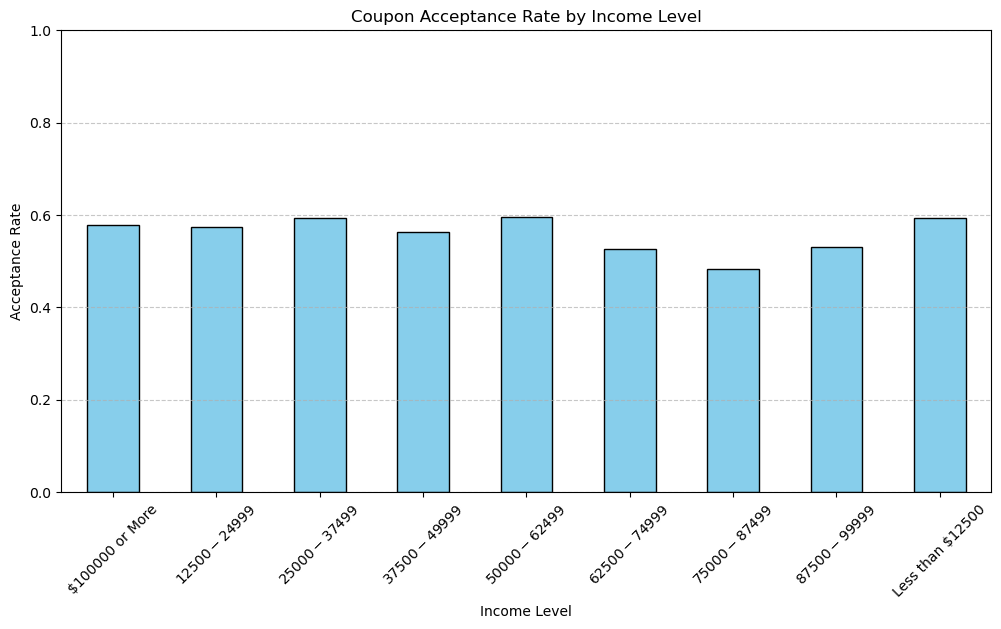

In [44]:
#investigation of acceptance rate of coupon vs income level
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/coupons.csv')

#Calculate the acceptance rate for each income level
income_acceptance = data.groupby('income')['Y'].mean().sort_index()

#Plot the acceptance rate by income level
plt.figure(figsize=(12, 6))
income_acceptance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Coupon Acceptance Rate by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

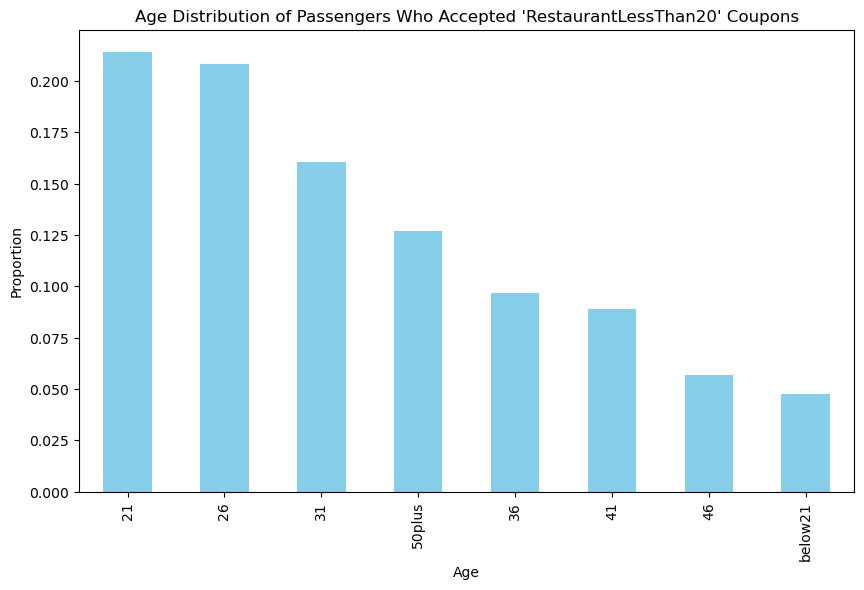

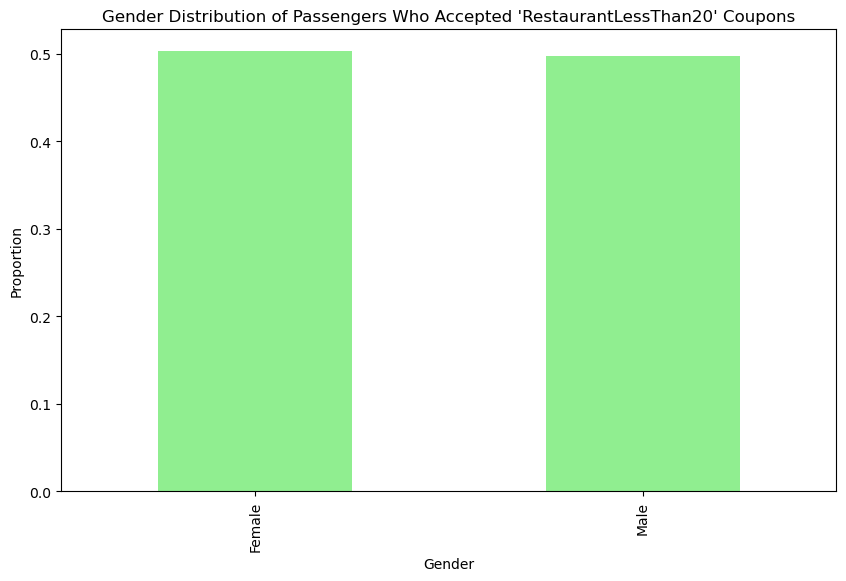

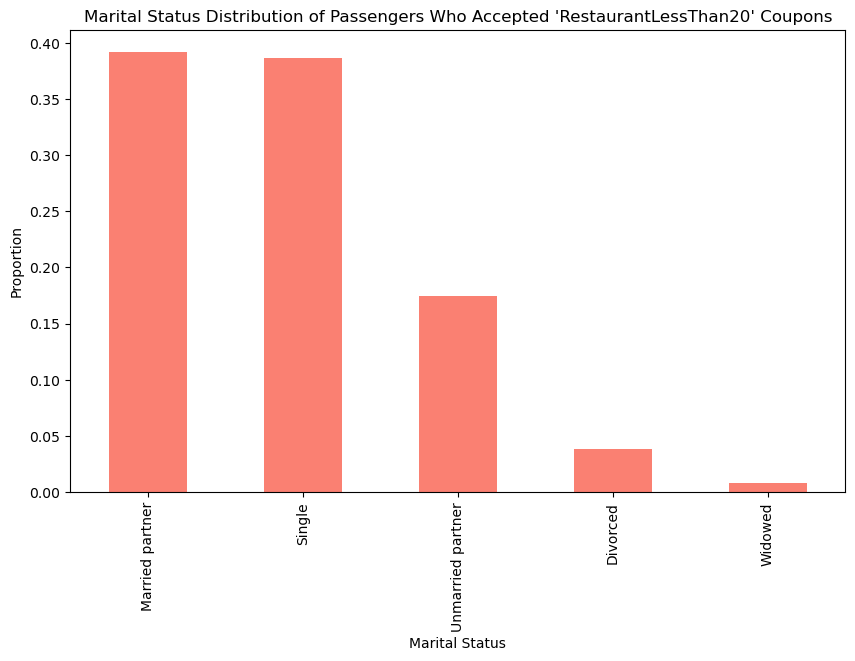

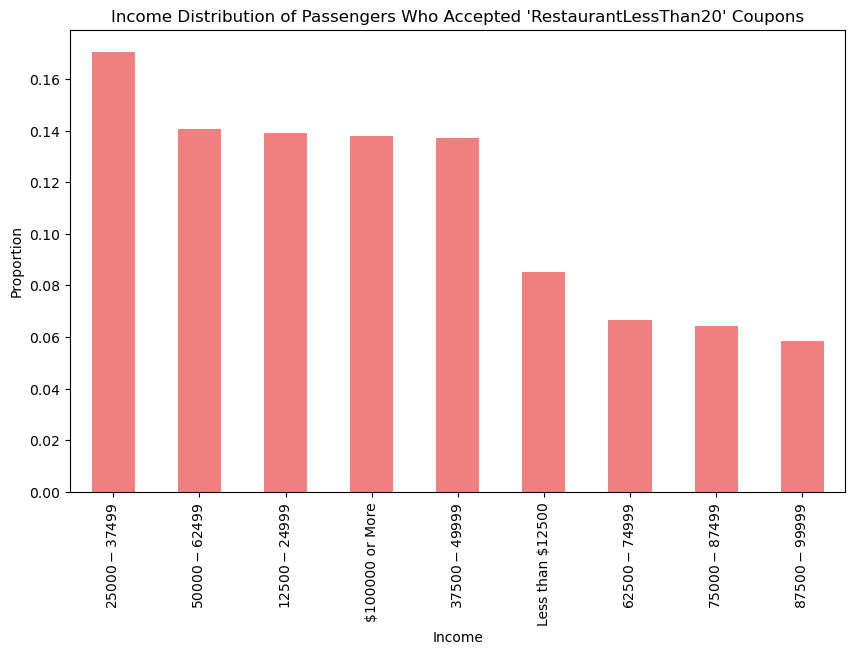

In [47]:
import matplotlib.pyplot as plt

#Plot Age Distribution
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='skyblue')
plt.title("Age Distribution of Passengers Who Accepted 'RestaurantLessThan20' Coupons")
plt.xlabel("Age")
plt.ylabel("Proportion")
plt.show()

#Plot Gender Distribution
plt.figure(figsize=(10, 6))
gender_distribution.plot(kind='bar', color='lightgreen')
plt.title("Gender Distribution of Passengers Who Accepted 'RestaurantLessThan20' Coupons")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.show()

#Plot Marital Status Distribution
plt.figure(figsize=(10, 6))
marital_status_distribution.plot(kind='bar', color='salmon')
plt.title("Marital Status Distribution of Passengers Who Accepted 'RestaurantLessThan20' Coupons")
plt.xlabel("Marital Status")
plt.ylabel("Proportion")
plt.show()

#Plot Income Distribution
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='bar', color='lightcoral')
plt.title("Income Distribution of Passengers Who Accepted 'RestaurantLessThan20' Coupons")
plt.xlabel("Income")
plt.ylabel("Proportion")
plt.show()


In [37]:
#Calculate the acceptance rate for 'RestaurantLessThan20' coupons
acceptance_rate_restaurant_less20 = restaurant_less20_coupons['Y'].mean()

print(f"Acceptance rate for 'RestaurantLessThan20' coupons: {acceptance_rate_restaurant_less20:.2f}")

Acceptance rate for 'RestaurantLessThan20' coupons: 0.71


In [38]:
#Analyze characteristics of passengers who accepted 'RestaurantLessThan20' coupons
accepted_restaurant_less20 = restaurant_less20_coupons[restaurant_less20_coupons['Y'] == 1]

#Calculate the distribution of characteristics
age_distribution = accepted_restaurant_less20['age'].value_counts(normalize=True)
gender_distribution = accepted_restaurant_less20['gender'].value_counts(normalize=True)
marital_status_distribution = accepted_restaurant_less20['maritalStatus'].value_counts(normalize=True)
income_distribution = accepted_restaurant_less20['income'].value_counts(normalize=True)

#Display the distributions
print("Age Distribution of Passengers Who Accepted 'RestaurantLessThan20' Coupons:")
print(age_distribution)
print("\nGender Distribution of Passengers Who Accepted 'RestaurantLessThan20' Coupons:")
print(gender_distribution)
print("\nMarital Status Distribution of Passengers Who Accepted 'RestaurantLessThan20' Coupons:")
print(marital_status_distribution)
print("\nIncome Distribution of Passengers Who Accepted 'RestaurantLessThan20' Coupons:")
print(income_distribution)

Age Distribution of Passengers Who Accepted 'RestaurantLessThan20' Coupons:
age
21         0.214213
26         0.208122
31         0.160406
50plus     0.126904
36         0.096954
41         0.088832
46         0.056853
below21    0.047716
Name: proportion, dtype: float64

Gender Distribution of Passengers Who Accepted 'RestaurantLessThan20' Coupons:
gender
Female    0.502538
Male      0.497462
Name: proportion, dtype: float64

Marital Status Distribution of Passengers Who Accepted 'RestaurantLessThan20' Coupons:
maritalStatus
Married partner      0.391878
Single               0.386802
Unmarried partner    0.174619
Divorced             0.038579
Widowed              0.008122
Name: proportion, dtype: float64

Income Distribution of Passengers Who Accepted 'RestaurantLessThan20' Coupons:
income
$25000 - $37499     0.170558
$50000 - $62499     0.140609
$12500 - $24999     0.139086
$100000 or More     0.138071
$37500 - $49999     0.137056
Less than $12500    0.085279
$62500 - $74999     0.0